In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/peptide_files/AllQuantifiedPeptides_PXD024017.tsv', sep='\t')

In [3]:
df.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_01-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_02-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_03-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_04-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250ng_01-calib,...,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_2c5ng_04-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_01-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_02-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_03-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_04-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_01-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_02-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_03-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_04-calib,Unnamed: 45
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,SRP14,Homo sapiens,6870.007986,6444.721926,1202.829593,7156.266022,8539.543989,...,MSMS,MBR,MBR,MBR,MBR,MSMS,MSMS,MSMS,MSMS,NaN
1,AAAAAAALQAK,AAAAAAALQAK,P36578;UNDEFINED,RPL4;,Homo sapiens;,395412.406250,378273.248454,386069.783334,378255.542211,324442.358627,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN
2,AAAAELLAQTTHFLHDPK,AAAAELLAQTTHFLHDPK,UNDEFINED,NaN,NaN,3060.626401,3407.030738,2921.195212,736.006719,0.000000,...,MBR,MBR,NotDetected,NotDetected,NotDetected,MBR,MBR,MBR,MSMS,NaN
3,AAAALMQDR,AAAALMQDR,Q13671,RIN1,Homo sapiens,0.000000,0.000000,0.000000,0.000000,0.000000,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN
4,AAAAVEPDVVVK,AAAAVEPDVVVK,Q9BQE4,SELENOS,Homo sapiens,7282.575785,6891.061826,7346.847384,7743.375926,6604.426821,...,MSMS,MBR,NotDetected,MBR,NotDetected,MBR,MBR,MBR,MBR,NaN


In [4]:
# we need to get the PGM1 protein and see if it's kind of looking the same. 

In [5]:
df_peptide_notshared = df[~df['Protein Groups'].str.contains(';')]
df_peptide_notshared 

df_peptide_shared = df[df['Protein Groups'].str.contains(';')]
df_peptide_shared

df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')
# df_peptide_shared[['Gene Names', 'gene_split']]

#expand the rows. the concat onto other df
df2_pep_shared = df_peptide_shared.explode('gene_split').reset_index(drop=True)
df2_pep_shared['Gene Names'] = df2_pep_shared['Gene Names'].str.split(';').str[0]
df2_pep_shared = df2_pep_shared[df2_pep_shared['gene_split'] != ""] #without this line protein that have the format AAX; are added twice

df_combined = pd.concat([df_peptide_notshared, df2_pep_shared])
df_combined

/var/folders/zk/jc657sbs27l7_q82ygdlvxxc0000gp/T/ipykernel_39340/226859099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peptide_shared['gene_split'] = df_peptide_shared['Gene Names'].str.split(';')


,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_01-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_02-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_03-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_04-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250ng_01-calib,...,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_01-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_02-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_03-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_500pg_04-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_01-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_02-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_03-calib,Detection Type_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_5ng_04-calib,Unnamed: 45,gene_split
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,SRP14,Homo sapiens,6.870008e+03,6.444722e+03,1.202830e+03,7.156266e+03,8.539544e+03,...,MBR,MBR,MBR,MBR,MSMS,MSMS,MSMS,MSMS,NaN,NaN
2,AAAAELLAQTTHFLHDPK,AAAAELLAQTTHFLHDPK,UNDEFINED,NaN,NaN,3.060626e+03,3.407031e+03,2.921195e+03,7.360067e+02,0.000000e+00,...,MBR,NotDetected,NotDetected,NotDetected,MBR,MBR,MBR,MSMS,NaN,NaN
3,AAAALMQDR,AAAALMQDR,Q13671,RIN1,Homo sapiens,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NotDetected,NaN,NaN
4,AAAAVEPDVVVK,AAAAVEPDVVVK,Q9BQE4,SELENOS,Homo sapiens,7.282576e+03,6.891062e+03,7.346847e+03,7.743376e+03,6.604427e+03,...,MBR,NotDetected,MBR,NotDetected,MBR,MBR,MBR,MBR,NaN,NaN
5,AAAEQAISVR,AAAEQAISVR,Q01780,EXOSC10,Homo sapiens,1.257698e+04,1.264432e+04,1.172831e+04,1.174356e+04,1.581856e+04,...,MBR,MBR,MBR,MBR,MSMS,MSMS,MSMS,MSMS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15011,YYSFFDLNPK,YYSFFDLNPK,Q96AC1;Q9BQL6,FERMT2,Homo sapiens,2.158725e+04,1.906881e+04,2.050928e+04,2.156447e+04,2.313043e+04,...,MBR,MBR,MBR,MBR,MSMS,MSMS,MSMS,MSMS,NaN,FERMT2
15012,YYSFFDLNPK,YYSFFDLNPK,Q96AC1;Q9BQL6,FERMT2,Homo sapiens,2.158725e+04,1.906881e+04,2.050928e+04,2.156447e+04,2.313043e+04,...,MBR,MBR,MBR,MBR,MSMS,MSMS,MSMS,MSMS,NaN,FERMT1
15013,YYTLNGSK,YYTLNGSK,P49748;UNDEFINED,ACADVL,Homo sapiens;,3.323225e+04,3.355509e+04,3.246661e+04,3.604890e+04,3.730365e+04,...,MBR,MBR,MBR,MBR,MSMS,MBR,MSMS,MBR,NaN,ACADVL
15015,YYVTIIDAPGHR,YYVTIIDAPGHR,P68104;UNDEFINED,EEF1A1,Homo sapiens;,3.584950e+06,3.801242e+06,4.144702e+06,3.884929e+06,1.734301e+06,...,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,MSMS,NaN,EEF1A1


In [6]:
df_combined.columns

Index(['Sequence', 'Base Sequence', 'Protein Groups', 'Gene Names', 'Organism',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_01-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_02-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_03-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_1ng_04-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250ng_01-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_02-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_03-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_04-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_2c5ng_01-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_2c5ng_02-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_2c5ng_03-calib',
       'Intensity_20201207_Exploris_R

In [7]:
#how many proteins are there total?
df_combined = df_combined[['Gene Names','Sequence',
     'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_02-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_03-calib',
       'Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_04-calib'
   ]]


In [8]:
#Calculates the total spectral count for each row. Will help to find examples
def calc_totals(row):
    total = 0
    if row[2] != 0:
        total += 1
    if row[3] != 0:
        total += 1
    if row[4] != 0:
        total += 1
    return total


df_with_totals = df_combined.copy()
df_with_totals['Total_Count'] = df_with_totals.apply(calc_totals, axis = 1)
df_with_totals = df_with_totals[~df_with_totals['Gene Names'].isnull()]


In [9]:
df_with_totals

,Gene Names,Sequence,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_02-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_03-calib,Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_04-calib,Total_Count
0,SRP14,AAAAAAAAAPAAAATAPTTAATTAATAAQ,10019.342495,6.983306e+03,1.017976e+04,3
3,RIN1,AAAALMQDR,0.000000,0.000000e+00,0.000000e+00,0
4,SELENOS,AAAAVEPDVVVK,0.000000,0.000000e+00,0.000000e+00,0
5,EXOSC10,AAAEQAISVR,10523.533219,1.221646e+04,1.686188e+04,3
9,TOMM70,AAAFEQLQK,58631.641465,6.310269e+04,5.848592e+04,3
...,...,...,...,...,...,...
15011,FERMT2,YYSFFDLNPK,21493.221115,2.779707e+04,1.461147e+04,3
15012,FERMT2,YYSFFDLNPK,21493.221115,2.779707e+04,1.461147e+04,3
15013,ACADVL,YYTLNGSK,40603.957291,4.429473e+04,3.719211e+04,3
15015,EEF1A1,YYVTIIDAPGHR,907930.383867,1.216033e+06,1.413577e+06,3


In [10]:
df_gene_ind = df_with_totals.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
df_gene_ind = df_gene_ind[df_gene_ind['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
df_gene_ind.sort_index()



Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_02-calib  \
Gene Names Sequence                                                                                                                     
A2M        ATVLNYLPK                                                                                79442.557627                        
           ATVLNYLPK                                                                                79442.557627                        
           LPPNVVEESAR                                                                              55121.979343                        
           MVSGFIPLKPTVK                                                                            18673.201904                        
           MVSGFIPLKPTVK                                                                            18673.201904                        
...                                                                                                          ...                        
ZYX        PLSIEADDNGC[Common Fixed:Carbamidomethyl on C]F...                                           0.000000                        
           PQVQLHVQSQTQPVSLANTQPR                                                                   16381.840380                        
           PSPAISVSVSAPAFYAPQK                                                                          0.000000                        
           QNVAVNELC[Common Fixed:Carbamidomethyl on C]GR                                           55780.098784                        
           SPSSSQPLPQVPAPAQSQTQFHVQPQPQPK                                                            5999.040498                        

                                                               Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_03-calib  \
Gene Names Sequence                                                                                                                     
A2M        ATVLNYLPK                                                                                82013.347204                        
           ATVLNYLPK                                                                                82013.347204                        
           LPPNVVEESAR                                                                              51611.288110                        
           MVSGFIPLKPTVK                                                                            20104.191620                        
           MVSGFIPLKPTVK                                                                            20104.191620                        
...                                                                                                          ...                        
ZYX        PLSIEADDNGC[Common Fixed:Carbamidomethyl on C]F...                                        7110.765713                        
           PQVQLHVQSQTQPVSLANTQPR                                                                       0.000000                        
           PSPAISVSVSAPAFYAPQK                                                                       6309.525137                        
           QNVAVNELC[Common Fixed:Carbamidomethyl on C]GR                                           56036.630854                        
           SPSSSQPLPQVPAPAQSQTQFHVQPQPQPK                                                            8630.219419                        

                                                               Intensity_20201207_Exploris_RSLC9_PepSep_PHF-3um_HeLaPi_250pg_04-calib  \
Gene Names Sequence                                                                                                                     
A2M        ATVLNYLPK                                                                                85698.832951                        
           ATVLNYLPK                                                                    

In [11]:
len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

3814

In [12]:
len(list(df_gene_ind.index.get_level_values('Sequence')))

17820

In [13]:
no_consistent= []
one_consistent = []
two_consistent = []
three_consistent = []
fourplus_consistent = []

num_proteins = 0

for gene, gene_df in df_gene_ind.groupby(level=0):
    num_proteins+=1
    #loop through each gene and count the number of consistent peptides
    if len(gene_df[gene_df['Total_Count'] == 3]) == 0:
        no_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) == 1:
        one_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) == 2:
#         import pdb; pdb.set_trace()
        two_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) == 3:
        three_consistent.append(gene)
    elif len(gene_df[gene_df['Total_Count'] == 3]) >= 4:
        fourplus_consistent.append(gene)
        
    else:
        print('something is wrong')



In [14]:
len(fourplus_consistent)

1286

In [15]:
len(three_consistent)

445

In [16]:
num_proteins

3814

In [17]:
'''
returns a dictionary where the key is the number of peptides, 
and the value is the number of proteins
Example: 5:4 would mean that 4 proteins consist of 5 peptides
'''
def get_num_pep_dict(df_with_totals, pep_consistency_list):
    subdf = df_with_totals[df_with_totals['Gene Names'].isin(pep_consistency_list)]
    subdf = subdf.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
    subdf = subdf[subdf['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
    subdf = subdf.sort_index()
    
    
    num_pep_consis = {}
    for gene, gene_df in subdf.groupby(level=0):
        num_peptides = len(gene_df)
        if num_peptides not in num_pep_consis.keys():    
            num_pep_consis[num_peptides] = 1
        else:
            num_pep_consis[num_peptides] += 1

    return num_pep_consis    

In [18]:
no_consis_d = get_num_pep_dict(df_with_totals, no_consistent)
one_consis_d = get_num_pep_dict(df_with_totals, one_consistent)
two_consis_d = get_num_pep_dict(df_with_totals, two_consistent)
three_consis_d = get_num_pep_dict(df_with_totals, three_consistent)
fourplus_consis_d = get_num_pep_dict(df_with_totals, fourplus_consistent)


In [19]:
no_consis_d

{1: 384, 2: 53, 3: 10, 4: 5}

## make figure

In [20]:
num_pep_0consis_series = pd.Series(no_consis_d)
num_pep_1consis_series = pd.Series(one_consis_d)
num_pep_2consis_series = pd.Series(two_consis_d)
num_pep_3consis_series = pd.Series(three_consis_d)
num_pep_4plusconsis_series = pd.Series(fourplus_consis_d)

In [21]:
plotdf = pd.concat([num_pep_0consis_series,
           num_pep_1consis_series,
          num_pep_2consis_series,
          num_pep_3consis_series,
          num_pep_4plusconsis_series],axis=1)


plotdf.rename({0:'0',
              1:'1',
              2:'2',
              3:'3',
              4:'4'}, axis=1, inplace=True)

plotdf = plotdf.sort_index()

In [22]:
plotdf.head() #index is the number of peptides in a protein. Values are the number of proteins

,0,1,2,3,4
1,384.0,698.0,NaN,NaN,NaN
2,53.0,251.0,356.0,NaN,NaN
3,10.0,54.0,156.0,239.0,NaN
4,5.0,13.0,73.0,128.0,147.0
5,NaN,2.0,18.0,56.0,191.0


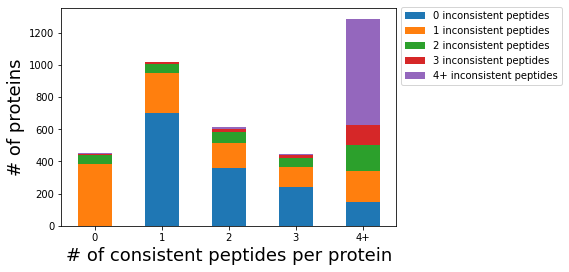

In [23]:
plotdf = plotdf.reset_index()

melted = pd.melt(plotdf, id_vars='index', value_vars=plotdf.columns.tolist())
melted.rename({'variable':'category', 'index':'total_peptides', 'value':'num_proteins'}, axis=1, inplace=True)
melted = melted[melted['num_proteins'].notnull()]
melted.head()

# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot4 = melted.copy()
plot4



def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])        
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot4 = melted.copy()
plot4['inconsistent_count'] = plot4.apply(get_inconsistent_count, axis=1)
plot4 = plot4.sort_values('category')
plot4.replace('4 consistent peptide', '4+ consistent peptide', inplace=True)
plot4.replace('4', '4+', inplace=True)


plot4.drop(columns='total_peptides', inplace=True)

plot4 = plot4.groupby(['category', 'inconsistent_count'])['num_proteins'].sum().unstack().fillna(0)

#format to deal with 4+
above4 = list(plot4.columns)
above4 = [x for x in above4 if x >= 4]
plot4['4+'] = plot4[above4].sum(axis=1)
plot4.drop(columns=above4, axis=1,inplace=True)

plot4 = plot4.rename({0:'0 inconsistent peptides',
             1:'1 inconsistent peptides',
             2:'2 inconsistent peptides',
             3:'3 inconsistent peptides',
             '4+':'4+ inconsistent peptides'}, axis=1)
plot4


from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
ax = plot4.plot(kind='bar', stacked=True)

plt.xticks(rotation=0, ha='center')

ax.legend(bbox_to_anchor=(1., 1.03))

plt.xlabel('# of consistent peptides per protein', fontsize=18)
plt.ylabel('# of proteins', fontsize=18)
plt.savefig('stacked_bar_chart.png', dpi=600, bbox_inches = "tight")

plt.show()

In [24]:
plotdf.sum()

index    1456.0
0         452.0
1        1018.0
2         613.0
3         445.0
4        1286.0
dtype: float64

In [25]:
num_prot = len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

In [26]:
num_prot

3814

In [27]:
print('0 consistent: ' + str(round(1022/num_prot*100, 2)))
print('1 consistent: ' + str(round(395/num_prot*100, 2)))
print('2 consistent: ' + str(round(195/num_prot*100,2)))
print('3 consistent: ' + str(round(110/num_prot*100,2)))
print('4+ consistent: ' + str(round(385/num_prot*100,2)))

0 consistent: 26.8
1 consistent: 10.36
2 consistent: 5.11
3 consistent: 2.88
4+ consistent: 10.09
